In [35]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture as gmm
import matplotlib.pyplot as plt

In [36]:
df = pd.read_csv('../data/전체인구수_추가.csv',encoding='cp949',index_col=0)
df.head()

,역사명,동별,역위도,역경도,일평균승하차,업장수,1인 가구수,2인 가구수,환승,총 상가 수,...,1인 가구수 레벨,2인 가구수 레벨,20~40대 인구 수 레벨,고속버스 터미널,기차역,여객 터미널,주변 관광지,주변 대학교,유동인구,전체인구수
0,다대포해수욕장,다대1동,35.048670,128.964100,7761,345,6277,4362,NaN,2.0,...,88,96,97,NaN,NaN,NaN,3,0,37932,38523
1,다대포항,다대1동,35.057820,128.971300,6221,345,6277,4362,NaN,1.0,...,88,96,97,NaN,NaN,NaN,1,0,37932,38523
2,낫개,다대2동,35.065265,128.979873,8327,246,4633,3170,NaN,1.0,...,71,81,60,NaN,NaN,NaN,0,0,50774,26678
3,신장림,장림2동,35.074433,128.977041,5360,302,4160,3230,NaN,1.0,...,62,86,78,NaN,NaN,NaN,0,0,33475,27244
4,장림,장림2동,35.081090,128.977500,5490,302,4160,3230,NaN,1.0,...,62,86,78,NaN,NaN,NaN,0,0,33475,27244


In [37]:
df.columns

Index(['역사명', '동별', '역위도', '역경도', '일평균승하차', '업장수', '1인 가구수', '2인 가구수', '환승',
       '총 상가 수', '공실 상가 수', '전체 상가 면적', '공실 상가 면적', '20~40대 인구 수', '일평균승하차 레벨',
       '업장수 레벨', '1인 가구수 레벨', '2인 가구수 레벨', '20~40대 인구 수 레벨', '고속버스 터미널', '기차역',
       '여객 터미널', '주변 관광지', '주변 대학교', '유동인구', '전체인구수'],
      dtype='object')

In [38]:
use_df = df[['역사명', '동별', '유동인구', '업장수', '전체 상가 면적', '전체인구수']].dropna()
use_df.head()

,역사명,동별,유동인구,업장수,전체 상가 면적,전체인구수
0,다대포해수욕장,다대1동,37932,345,68.0,38523
1,다대포항,다대1동,37932,345,76.0,38523
2,낫개,다대2동,50774,246,24.0,26678
3,신장림,장림2동,33475,302,78.0,27244
4,장림,장림2동,33475,302,24.0,27244


In [39]:
param = np.array(use_df[[ '유동인구', '업장수', '전체 상가 면적', '전체인구수']])
len(param)

92

In [40]:
gm = gmm(n_components=3,random_state=42)
labels = gm.fit_predict(param)

In [41]:
use_df['group'] = labels
use_df.head()

,역사명,동별,유동인구,업장수,전체 상가 면적,전체인구수,group
0,다대포해수욕장,다대1동,37932,345,68.0,38523,0
1,다대포항,다대1동,37932,345,76.0,38523,0
2,낫개,다대2동,50774,246,24.0,26678,0
3,신장림,장림2동,33475,302,78.0,27244,0
4,장림,장림2동,33475,302,24.0,27244,0


In [58]:
use_df[use_df['group']>=1]

,역사명,동별,유동인구,업장수,전체 상가 면적,전체인구수,group
6,신평,신평2동,68987,177,287.0,17887,1
15,자갈치,남포동,175621,391,593.0,1124,1
17,중앙,중앙동,98152,734,791.0,3669,1
19,초량,초량3동,62518,232,515.0,13505,1
23,범내골,범천1동,99524,894,45.0,12555,1
24,서면,부전2동,352597,136818,130.0,10868,2
25,부전,부전1동,173304,973,101.0,15989,1
28,연산,연산4동,183140,59838,286.0,16006,1
30,동래,온천2동,174176,36658,746.0,24383,1
32,온천장,온천1동,148518,318,367.0,22605,1


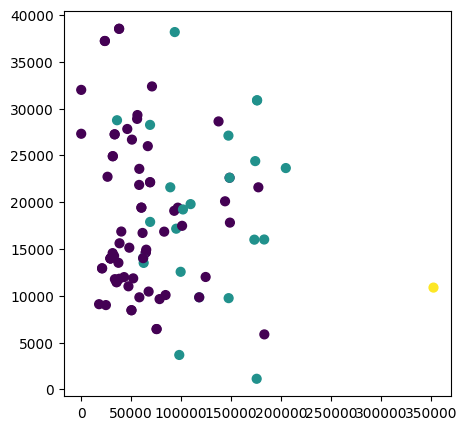

In [73]:
전체인구수 = plt.figure(figsize=(5,5))

전체인구수 = plt.scatter(use_df['유동인구'], use_df['전체인구수'], c=labels, s=40, cmap='viridis');
전체인구수.

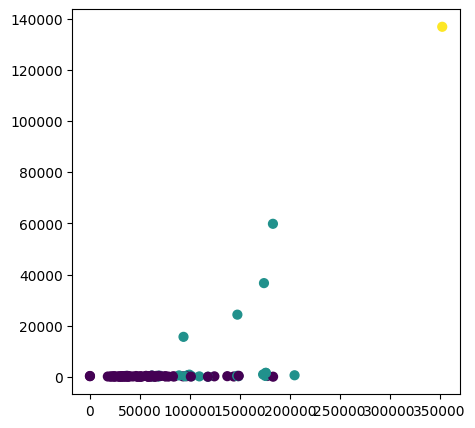

In [74]:
업장수 = plt.figure(figsize=(5,5))

업장수 = plt.scatter(use_df['유동인구'], use_df['업장수'], c=labels, s=40, cmap='viridis');

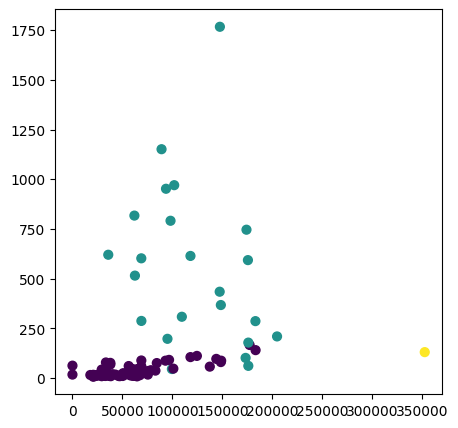

In [75]:
전체_상가_면적 = plt.figure(figsize=(5,5))

전체_상가_면적 = plt.scatter(use_df['유동인구'], use_df['전체 상가 면적'], c=labels, s=40, cmap='viridis');